In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.feature_selection import SelectFromModel,SequentialFeatureSelector
from xlwt import Workbook

C:\Users\R.Gokulprasath\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
fulldata = pd.read_csv("dataset_full.csv")

In [38]:
fulldata.head()

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,...,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
0,3,0,0,1,0,0,0,0,0,0,...,1,2,0,892,0,0,0,0,0,1
1,5,0,1,3,0,3,0,2,0,0,...,1,2,1,9540,1,0,0,0,0,1
2,2,0,0,1,0,0,0,0,0,0,...,1,2,3,589,1,0,0,0,0,0
3,4,0,2,5,0,0,0,0,0,0,...,1,2,0,292,1,0,0,0,0,1
4,2,0,0,0,0,0,0,0,0,0,...,1,2,1,3597,0,1,0,0,0,0


In [39]:
fulldata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88647 entries, 0 to 88646
Columns: 112 entries, qty_dot_url to phishing
dtypes: float64(1), int64(111)
memory usage: 75.7 MB


In [42]:
fulldata.isnull().sum()

qty_dot_url             0
qty_hyphen_url          0
qty_underline_url       0
qty_slash_url           0
qty_questionmark_url    0
                       ..
qty_redirects           0
url_google_index        0
domain_google_index     0
url_shortened           0
phishing                0
Length: 112, dtype: int64

<b><p style='color:green;font-size:20px'>Viewing if there is null present in the features</p></b>

<AxesSubplot:>

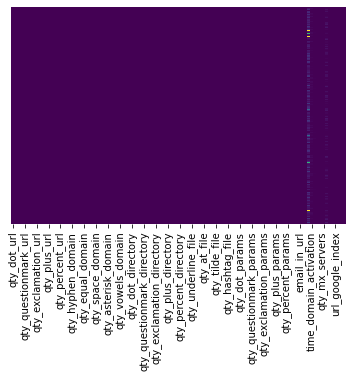

In [43]:
sns.heatmap(fulldata,yticklabels=False,cbar=False,cmap='viridis')

<b><p style='color:green;font-size:20px'>Function to check null values in all the features</p></b>

In [44]:
def checknull(cols):
    for i in range(0,cols):
        x=fulldata.loc[:,fulldata.columns[i]]
        if(x.isnull().sum()==0):
            continue
        else:
            print(fulldata.columns[i] , " has " , x.isnull().sum() ," values" )
            

In [45]:
checknull(112)

<b><p style='color:green;font-size:20px'>Function to get all the data regarding the feature</p></b>

In [46]:
def getData(cols):
    for i in range(0,cols):
        x=data.loc[:,fulldata.columns[i]]
        print("Col:{}           Min: {}        Max: {}       Mean: {}        STD: {}".format(fulldata.columns[i],x.min(),x.max(),x.mean(),x.std()))

<b><p style='color:green;font-size:20px'>Feature Selection (Random  Forest) </p></b>

In [5]:
def featureselector(fulldata,threshold,i,row):
    model = RandomForestClassifier(n_estimators=100)
    
    fs = SelectFromModel(model,threshold=threshold)
    
    fs.fit(fulldata.iloc[:,0:len(fulldata.columns)-1],fulldata.iloc[:,-1])
    
    selecteddata = fulldata.filter(fulldata.iloc[:,0:len(fulldata.columns)-1].columns[fs.get_support()],axis=1)
    
    selectedfe = fulldata.iloc[:,0:len(fulldata.columns)-1].columns[fs.get_support()]
    
    xtr,xte,ytr,yte=train_test_split(fulldata.iloc[:,0:len(fulldata.columns)-1],fulldata.iloc[:,-1],test_size=0.3,random_state=1)
    
    model.fit(xtr,ytr)
    
    pred = model.predict(xte)
    
    acc_score = accuracy_score(yte,pred)
    
    tot_selec_feature = len(selectedfe)
    sheet1.write(row,0,i)
    sheet1.write(row,1,threshold)
    sheet1.write(row,2,acc_score)
    sheet1.write(row,3,tot_selec_feature)
    #sheet1.write(row,4,selecteddata.to_string())
    
    print("Iteration : " , i)
    #print("Threshold : " , threshold)
    #print("Accuracy Score : " , acc_score)
    #print("Total Selected Features : " , tot_selec_features)
    #print("Features : " , selecteddata)

In [6]:
threshold = 0.001
row=2
wb = Workbook()
sheet1 = wb.add_sheet("sheet1")
sheet1.write(1,0,"Iteration")
sheet1.write(1,1,"Threshold")
sheet1.write(1,2,"Accuracy_Score")
sheet1.write(1,3,"Total_Features")
#sheet1.write(1,4,"Selected_Features")
for i in range(0,25):
    featureselector(fulldata,threshold,i,row)
    threshold=threshold+0.001
    row = row+1
wb.save("Feature_Selection.csv")

Iteration :  0
Iteration :  1
Iteration :  2
Iteration :  3
Iteration :  4
Iteration :  5
Iteration :  6
Iteration :  7
Iteration :  8
Iteration :  9
Iteration :  10
Iteration :  11
Iteration :  12
Iteration :  13
Iteration :  14
Iteration :  15
Iteration :  16
Iteration :  17
Iteration :  18
Iteration :  19
Iteration :  20
Iteration :  21
Iteration :  22
Iteration :  23
Iteration :  24


<b><p style='color:green;font-size:20px'>Inferences from the feature selector function using random forest </p></b>



Iteration :  9
Threshold :  0.010000000000000002
Accuracy Score :  0.9559508923496647
Selected Feature :  Index(['qty_dot_url', 'qty_hyphen_url', 'qty_slash_url', 'length_url',
       'qty_dot_domain', 'qty_vowels_domain', 'domain_length',
       'qty_dot_directory', 'qty_hyphen_directory', 'qty_slash_directory',
       'qty_questionmark_directory', 'qty_equal_directory',
       'qty_exclamation_directory', 'qty_space_directory',
       'qty_tilde_directory', 'qty_asterisk_directory', 'directory_length',
       'qty_dot_file', 'qty_underline_file', 'qty_slash_file',
       'qty_questionmark_file', 'qty_equal_file', 'qty_at_file',
       'qty_plus_file', 'qty_asterisk_file', 'qty_dollar_file', 'file_length',
       'time_response', 'asn_ip', 'time_domain_activation',
       'time_domain_expiration', 'qty_ip_resolved', 'qty_nameservers',
       'qty_mx_servers', 'ttl_hostname', 'qty_redirects'],
      dtype='object')
Total Selected Feature :  36




Iteration :  13
Threshold :  0.014000000000000005
Accuracy Score :  0.9559508923496647
Selected Feature :  Index(['qty_slash_url', 'length_url', 'qty_dot_domain', 'qty_vowels_domain',
       'domain_length', 'qty_hyphen_directory', 'qty_slash_directory',
       'qty_equal_directory', 'qty_exclamation_directory',
       'qty_hashtag_directory', 'qty_percent_directory', 'directory_length',
       'qty_dot_file', 'qty_questionmark_file', 'qty_equal_file',
       'qty_asterisk_file', 'file_length', 'time_response', 'asn_ip',
       'time_domain_activation', 'time_domain_expiration', 'qty_nameservers',
       'qty_mx_servers', 'ttl_hostname'],
      dtype='object')
Total Selected Feature :  24






Iteration :  22
Threshold :  0.023000000000000013
Accuracy Score :  0.9559508923496647
Selected Feature :  Index(['qty_slash_url', 'length_url', 'domain_length', 'qty_slash_directory',
       'directory_length', 'file_length', 'time_response', 'asn_ip',
       'time_domain_activation', 'time_domain_expiration', 'ttl_hostname'],
      dtype='object')
Total Selected Feature :  11

<b><p style='color:green;font-size:20px'>Creating data frames from the selected features </p></b>

In [6]:
sfeature1 = ['qty_dot_url', 'qty_hyphen_url', 'qty_slash_url', 'length_url', 'qty_dot_domain', 'qty_vowels_domain', 'domain_length', 'qty_dot_directory', 'qty_hyphen_directory', 'qty_slash_directory', 'qty_questionmark_directory', 'qty_equal_directory', 'qty_exclamation_directory', 'qty_space_directory', 'qty_tilde_directory', 'qty_asterisk_directory', 'directory_length', 'qty_dot_file', 'qty_underline_file', 'qty_slash_file', 'qty_questionmark_file', 'qty_equal_file', 'qty_at_file', 'qty_plus_file', 'qty_asterisk_file', 'qty_dollar_file', 'file_length', 'time_response', 'asn_ip', 'time_domain_activation', 'time_domain_expiration', 'qty_ip_resolved', 'qty_nameservers', 'qty_mx_servers', 'ttl_hostname', 'qty_redirects','phishing']
sfeature2 = ['qty_slash_url', 'length_url', 'qty_dot_domain', 'qty_vowels_domain', 'domain_length', 'qty_hyphen_directory', 'qty_slash_directory', 'qty_equal_directory', 'qty_exclamation_directory', 'qty_hashtag_directory', 'qty_percent_directory', 'directory_length', 'qty_dot_file', 'qty_questionmark_file', 'qty_equal_file', 'qty_asterisk_file', 'file_length', 'time_response', 'asn_ip', 'time_domain_activation', 'time_domain_expiration', 'qty_nameservers', 'qty_mx_servers', 'ttl_hostname','phishing']
sfeature3 = ['qty_slash_url', 'length_url', 'domain_length', 'qty_slash_directory', 'directory_length', 'file_length', 'time_response', 'asn_ip', 'time_domain_activation', 'time_domain_expiration', 'ttl_hostname','phishing']

In [7]:
selectedTesting_data1 = fulldata.filter(sfeature1)
selectedTesting_data2 = fulldata.filter(sfeature2)
selectedTesting_data3 = fulldata.filter(sfeature3)

<b><p style='color:green;font-size:20px'>Splitting training and testing data</p></b>

In [8]:
x1train,x1test,y1train,y1test = train_test_split(selectedTesting_data1.iloc[:,0:len(selectedTesting_data1.columns)-1],selectedTesting_data1.iloc[:,-1],test_size=0.3,random_state=1)
x2train,x2test,y2train,y2test = train_test_split(selectedTesting_data2.iloc[:,0:len(selectedTesting_data2.columns)-1],selectedTesting_data2.iloc[:,-1],test_size=0.3,random_state=1)
x3train,x3test,y3train,y3test = train_test_split(selectedTesting_data3.iloc[:,0:len(selectedTesting_data3.columns)-1],selectedTesting_data3.iloc[:,-1],test_size=0.3,random_state=1)

<b><p style='color:green;font-size:20px'>Random Forest (Finding the best value for the parameter n_estimator)</p></b>

In [130]:
def randomforestmodel(value,xtr,ytr,xte,yte):
    randomforest = RandomForestClassifier(n_estimators=value)
    randomforest.fit(xtr,ytr)
    randomforest_predictions = randomforest.predict(xte)
    accuracy = accuracy_score(randomforest_predictions,yte)
    if(accuracy>=0.9449812436057747):
        print("The accuracy for the estiamtor value:", value," is ", accuracy)

In [131]:
def estimatorfinder(xtra,ytra,xtes,ytes):
    for i in range(2,100):
        randomforestmodel(i,xtra,ytra,xtes,ytes)

In [132]:
print("Testing with first set")
estimatorfinder(x1train,y1train,selectedTesting_data1.iloc[:,0:len(selectedTesting_data1.columns)-1],selectedTesting_data1.iloc[:,-1])
print("Testing with second set")
estimatorfinder(x2train,y2train,selectedTesting_data2.iloc[:,0:len(selectedTesting_data2.columns)-1],selectedTesting_data2.iloc[:,-1])
print("Testing with third set")
estimatorfinder(x3train,y3train,selectedTesting_data3.iloc[:,0:len(selectedTesting_data3.columns)-1],selectedTesting_data3.iloc[:,-1])

Testing with first set
The accuracy for the estiamtor value: 2  is  0.9673536611504056
The accuracy for the estiamtor value: 3  is  0.9794804110686205
The accuracy for the estiamtor value: 4  is  0.9795706566494072
The accuracy for the estiamtor value: 5  is  0.9817703926810833
The accuracy for the estiamtor value: 6  is  0.9843987952214965
The accuracy for the estiamtor value: 7  is  0.9854479000981421
The accuracy for the estiamtor value: 8  is  0.9867000575315578
The accuracy for the estiamtor value: 9  is  0.9868128645075411
The accuracy for the estiamtor value: 10  is  0.9871512854354914
The accuracy for the estiamtor value: 11  is  0.9864857242771893
The accuracy for the estiamtor value: 12  is  0.9881891096145385
The accuracy for the estiamtor value: 13  is  0.9872979345042697
The accuracy for the estiamtor value: 14  is  0.9880086184529652
The accuracy for the estiamtor value: 15  is  0.9885162498448904
The accuracy for the estiamtor value: 16  is  0.9883019165905219
The accura

The accuracy for the estiamtor value: 30  is  0.9892833372815775
The accuracy for the estiamtor value: 31  is  0.9890690040272091
The accuracy for the estiamtor value: 32  is  0.9892833372815775
The accuracy for the estiamtor value: 33  is  0.9887869865872505
The accuracy for the estiamtor value: 34  is  0.9895427933263393
The accuracy for the estiamtor value: 35  is  0.9895202319311426
The accuracy for the estiamtor value: 36  is  0.9893623021647658
The accuracy for the estiamtor value: 37  is  0.9891028461200041
The accuracy for the estiamtor value: 38  is  0.9896330389071261
The accuracy for the estiamtor value: 39  is  0.9896330389071261
The accuracy for the estiamtor value: 40  is  0.989565354721536
The accuracy for the estiamtor value: 41  is  0.989565354721536
The accuracy for the estiamtor value: 42  is  0.9895540740239377
The accuracy for the estiamtor value: 43  is  0.989565354721536
The accuracy for the estiamtor value: 44  is  0.9896556003023227
The accuracy for the estiamt

The accuracy for the estiamtor value: 58  is  0.9875461098514332
The accuracy for the estiamtor value: 59  is  0.9877604431058017
The accuracy for the estiamtor value: 60  is  0.9877942851985967
The accuracy for the estiamtor value: 61  is  0.9872640924114747
The accuracy for the estiamtor value: 62  is  0.987602513339425
The accuracy for the estiamtor value: 63  is  0.9877942851985967
The accuracy for the estiamtor value: 64  is  0.987602513339425
The accuracy for the estiamtor value: 65  is  0.9876927589202116
The accuracy for the estiamtor value: 66  is  0.9874333028754498
The accuracy for the estiamtor value: 67  is  0.9873204958994665
The accuracy for the estiamtor value: 68  is  0.9878168465937933
The accuracy for the estiamtor value: 69  is  0.9876927589202116
The accuracy for the estiamtor value: 70  is  0.9877717238034
The accuracy for the estiamtor value: 71  is  0.98763635543222
The accuracy for the estiamtor value: 72  is  0.9877604431058017
The accuracy for the estiamtor v

<b><p style='color:green;font-size:20px'>Accuracy score for the respective sets </p></b>



<b><p style='color:blue;font-size:18px'>Testing with first set </p></b>
The accuracy for the estiamtor value: 89  is  0.9557803796748892 for 36 features
<b><p style='color:blue;font-size:18px'>Testing with second set </p></b>
The accuracy for the estiamtor value: 71  is  0.9556667045583722 for 24 features
<b><p style='color:blue;font-size:18px'>Testing with third set </p></b>
The accuracy for the estiamtor value: 94  is  0.9449812436057747 for 11 features

<b><p style='color:green;font-size:20px'>Accuracy score for the respective sets ( Actual dataset_full.csv) </p></b>



<b><p style='color:blue;font-size:18px'>Testing with first set </p></b>
The accuracy for the estiamtor value: 77  is  0.9900617054158629 for 36 features
<b><p style='color:blue;font-size:18px'>Testing with second set </p></b>
The accuracy for the estiamtor value: 86  is  0.9901068282062563 for 24 features
<b><p style='color:blue;font-size:18px'>Testing with third set </p></b>
The accuracy for the estiamtor value: any  is  between(0.9801-0.9809) for 11 features

<b><p style='color:green;font-size:20px'>Making actual conclusion </p></b>

<b><p style='color:blue;font-size:18px'>Testing with 1st set </p></b>
Estimator value can be 82,83,84
<b><p style='color:blue;font-size:18px'>Testing with 2st set </p></b>
Estimator value can be 77,78,79

<b><p style='color:blue;font-size:18px'>Fixation </p></b>
Since both 36 and 24 features produced same accuracy fixing the 24 features as final set with estimator value of 78

<b><p style='color:green;font-size:20px'>Further refining the features </p></b>

In [144]:
random_model = RandomForestClassifier(n_estimators=78)

In [145]:
random_model.fit(x2train,y2train)

RandomForestClassifier(n_estimators=78)

In [198]:
largest=random_model.feature_importances_
names=random_model.feature_names_in_

In [202]:
largest1=largest.argsort()

In [204]:
largest3=largest[largest1]
names1=names[largest1]

In [210]:
largest2=largest3.reshape(-1,1)
names2=names.reshape(-1,1)

In [227]:
largest3 = largest2.reshape(24,)

<BarContainer object of 24 artists>

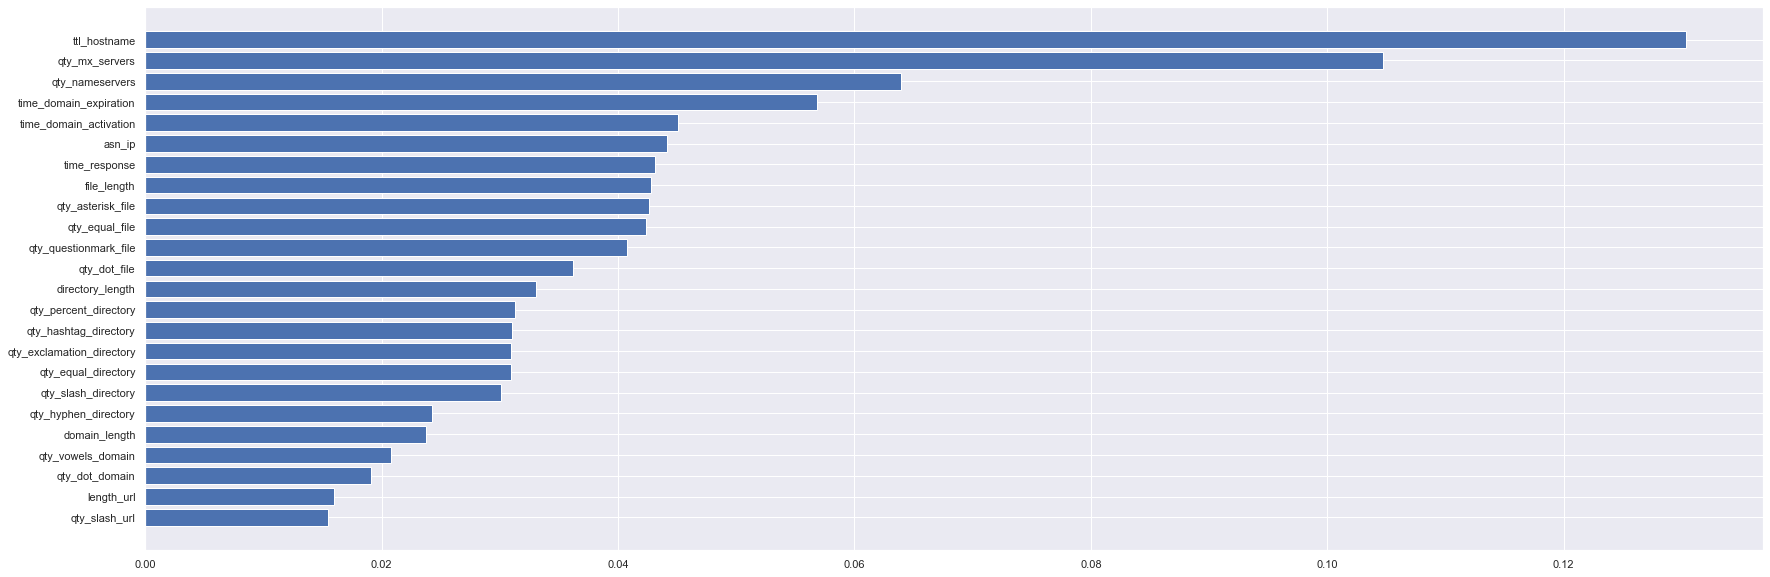

In [228]:
plt.barh(random_model.feature_names_in_,largest3)

<AxesSubplot:>

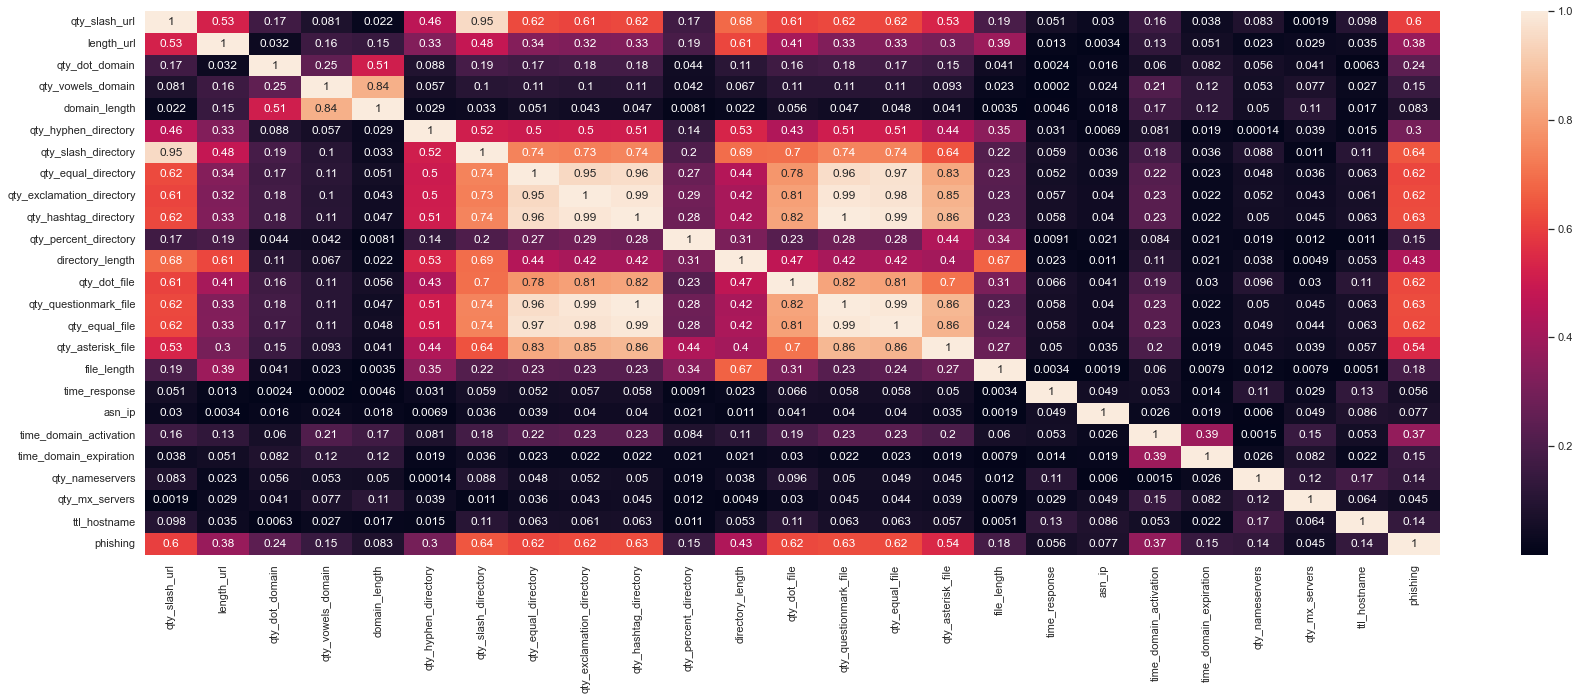

In [229]:
sns.set(rc = {'figure.figsize':(29,10)})
sns.heatmap(selected_data2.corr().abs(),annot=True)

<b><p style='color:green;font-size:20px'>Making inferences from the heatmap and importance plot </p></b>

In [253]:
# 1 qty slash url and qty slash director are highly correlated and in the importance plot qty slash url is given low importance
# 2 qty hashtag directory and qty equal file are highly correlated and in importance plot qty hashtag directory is given low importance

In [254]:
cor_matrix = selected_data2.corr().abs()
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]

C:\Users\R.Gokulprasath\AppData\Local\Temp\ipykernel_14564\3241181147.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))


In [9]:
df2 = selectedTesting_data2.loc[:,~selectedTesting_data2.columns.isin(['qty_slash_directory', 'qty_exclamation_directory', 'qty_hashtag_directory', 'qty_questionmark_file', 'qty_equal_file'])]

In [10]:
df2.columns

Index(['qty_slash_url', 'length_url', 'qty_dot_domain', 'qty_vowels_domain',
       'domain_length', 'qty_hyphen_directory', 'qty_equal_directory',
       'qty_percent_directory', 'directory_length', 'qty_dot_file',
       'qty_asterisk_file', 'file_length', 'time_response', 'asn_ip',
       'time_domain_activation', 'time_domain_expiration', 'qty_nameservers',
       'qty_mx_servers', 'ttl_hostname', 'phishing'],
      dtype='object')

<b><p style='color:green;font-size:20px'>Final feature set of 20 </p></b>

<b><p style='color:green;font-size:20px'>Train Test Split </p></b>

In [11]:
rx1train,rx1test,ry1train,ry1test=train_test_split(df2.iloc[:,0:len(df2.columns)-1],df2.iloc[:,-1],test_size=0.3,random_state=1)

<b><p style='color:green;font-size:20px'>Model - 1 ( Random Forest ) </p></b>

In [12]:
randomforestclassifier = RandomForestClassifier(n_estimators=78)

In [16]:
randomforestclassifier.fit(rx1train.values,ry1train.values)


RandomForestClassifier(n_estimators=78)

In [18]:
rpredictions=randomforestclassifier.predict(rx1test.values)
print(accuracy_score(rpredictions,ry1test.values))

0.9685655198345554


In [31]:
randomforestclassifier.predict([ [3, 34, 1, 4, 14, 0, 0, 0, 0, 0, 0, 0, 1.790733, 0, 2, 363, 2, 0, 0] ])

array([1], dtype=int64)

In [15]:
rx1train

,qty_slash_url,length_url,qty_dot_domain,qty_vowels_domain,domain_length,qty_hyphen_directory,qty_equal_directory,qty_percent_directory,directory_length,qty_dot_file,qty_asterisk_file,file_length,time_response,asn_ip,time_domain_activation,time_domain_expiration,qty_nameservers,qty_mx_servers,ttl_hostname
17157,2,36,1,5,15,0,0,0,21,1,0,15,2.562982,26496,5350,1224,2,5,589
76696,0,26,1,10,26,-1,-1,-1,-1,-1,-1,-1,0.448349,26496,6845,12,2,2,10792
20577,2,99,1,4,7,0,0,0,28,1,0,8,0.266922,61278,-1,-1,2,1,5854
12232,0,18,2,5,18,-1,-1,-1,-1,-1,-1,-1,0.911946,25454,6356,217,2,1,14398
73905,0,8,1,2,8,-1,-1,-1,-1,-1,-1,-1,0.289922,13335,6243,1426,2,6,290
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21440,0,19,2,5,19,-1,-1,-1,-1,-1,-1,-1,0.423892,53831,6940,1825,2,1,7198
73349,0,11,2,1,11,-1,-1,-1,-1,-1,-1,-1,4.320519,59684,-1,-1,2,2,3598
50057,0,27,2,9,27,-1,-1,-1,-1,-1,-1,-1,0.440539,15169,-1,-1,4,0,293
5192,3,67,2,6,16,0,0,0,21,0,0,15,0.209353,15169,-1,-1,4,5,164


In [271]:
randomforestclassifier.fit(rx1train,ry1train)
rpredictions1=randomforestclassifier.predict(rx1test)
print(accuracy_score(rpredictions1,ry1test))

0.9687535250987027


<b><p style='color:green;font-size:20px'>Model - 2 ( Logistic Regression ) </p></b>

In [16]:
logisticregressionclassifier = LogisticRegression(solver='sag',penalty='l2')

In [17]:
logisticregressionclassifier.fit(rx1train,ry1train)
lpredictions=logisticregressionclassifier.predict(rx1test)
print(accuracy_score(lpredictions,ry1test))

0.6675690919345741


C:\Users\R.Gokulprasath\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [29]:
logisticregressionclassifier.fit(rx1train,ry1train)
lpredictions1=logisticregressionclassifier.predict(rx1test)
print(accuracy_score(lpredictions1,ry1test))

0.6675690919345741


C:\Users\R.Gokulprasath\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


<b><p style='color:green;font-size:20px'>Model - 3 ( Support Vector Machine ) </p></b>

In [18]:
supportvectormachine_model = SVC()

In [19]:
supportvectormachine_model.fit(rx1train,ry1train)
svmpredictions = supportvectormachine_model.predict(rx1test)
print(accuracy_score(svmpredictions,ry1test))

0.7549539387102839


In [40]:
supportvectormachine_model.fit(rx1train,ry1train)
svmpredictions1 = supportvectormachine_model.predict(rx1test)
print(accuracy_score(svmpredictions1,ry1test))

0.7549539387102839


<b><p style='color:green;font-size:20px'>Model - 4 ( AdaBoost Classifier ) </p></b>

In [19]:
ada = AdaBoostClassifier(n_estimators=78,learning_rate=1)

In [20]:
ada.fit(rx1train.values,ry1train.values)
#adapredictions = ada.predict(rx1test)
#print(accuracy_score(adapredictions,ry1test))

AdaBoostClassifier(learning_rate=1, n_estimators=78)

In [32]:
ada.predict([ [3, 34, 1, 4, 14, 0, 0, 0, 0, 0, 0, 0, 1.790733, 0, 2, 363, 2, 0, 0] ])

array([1], dtype=int64)

In [44]:
ada.fit(rx1train,ry1train)
adapredictions1 = ada.predict(rx1test)
print(accuracy_score(adapredictions1,ry1test))

0.9374318480917466


In [48]:
af=ada.feature_importances_
afm=af.argsort()
afm1=af[afm]
afmn=ada.feature_names_in_
afmn1=afmn[afm]

In [49]:
print(afmn1,afm1)

['qty_asterisk_file' 'qty_dot_file' 'qty_equal_directory'
 'qty_percent_directory' 'time_domain_expiration' 'qty_vowels_domain'
 'qty_mx_servers' 'qty_nameservers' 'time_response' 'file_length'
 'ttl_hostname' 'qty_hyphen_directory' 'qty_dot_domain' 'domain_length'
 'qty_slash_url' 'directory_length' 'length_url' 'asn_ip'
 'time_domain_activation'] [0.         0.01282051 0.01282051 0.01282051 0.02564103 0.02564103
 0.02564103 0.03846154 0.03846154 0.03846154 0.03846154 0.03846154
 0.05128205 0.06410256 0.06410256 0.07692308 0.11538462 0.15384615
 0.16666667]


<BarContainer object of 19 artists>

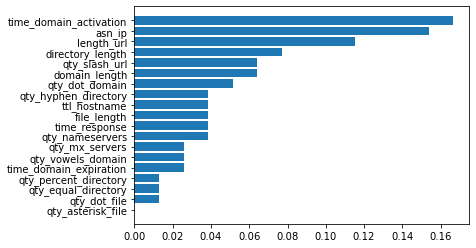

In [50]:
plt.barh(afmn1,afm1)

<b><p style='color:green;font-size:20px'>Model - 5 ( Gradient Boosting Classifier ) </p></b>

In [22]:
def gbcmodel(value,xtr,ytr,xte,yte):
    gbcmodel = GradientBoostingClassifier(n_estimators=value,learning_rate=1)
    gbcmodel.fit(xtr,ytr)
    gbcpredictions = gbcmodel.predict(xte)
    accuracy = accuracy_score(gbcpredictions,yte)
    if(accuracy>=0.94):
        print("The accuracy for the estiamtor value:", value," is ", accuracy)

In [57]:
for i in range(2,100):
    gbcmodel(i,rx1train,ry1train,rx1test,ry1test)

The accuracy for the estiamtor value: 44  is  0.9402068887120609
The accuracy for the estiamtor value: 45  is  0.9403205638285779
The accuracy for the estiamtor value: 46  is  0.9404910765033534
The accuracy for the estiamtor value: 47  is  0.9406615891781289
The accuracy for the estiamtor value: 48  is  0.9407752642946459
The accuracy for the estiamtor value: 49  is  0.9406615891781289
The accuracy for the estiamtor value: 50  is  0.9407184267363874
The accuracy for the estiamtor value: 51  is  0.9412299647607139
The accuracy for the estiamtor value: 52  is  0.9417983403432989
The accuracy for the estiamtor value: 53  is  0.9415141525520063
The accuracy for the estiamtor value: 54  is  0.9421393656928498
The accuracy for the estiamtor value: 55  is  0.9423667159258838
The accuracy for the estiamtor value: 56  is  0.9427077412754348
The accuracy for the estiamtor value: 57  is  0.9428214163919518
The accuracy for the estiamtor value: 58  is  0.9427645788336934
The accuracy for the esti

In [60]:
print("The best estiamtor value is 83 with an accuracy 0.9465726952370126")

The best estiamtor value is 83 with an accuracy 0.9465726952370126


In [22]:
gbcmodel = GradientBoostingClassifier(n_estimators=83,learning_rate=1)
gbcmodel.fit(rx1train.values,ry1train.values)

GradientBoostingClassifier(learning_rate=1, n_estimators=83)

In [29]:
gbcmodel.predict([ [3, 30, 2, 6, 21, 0, 0, 0, 0, 0, 0, 0, 0.487961, 0, 4947, 2723, 4, 0, 0] ])

array([0], dtype=int64)

<b><p style='color:green;font-size:20px'>Model - 6 ( XG Boost Classifier ) </p></b>

In [24]:
xgb = XGBClassifier(n_estimators=80)

In [25]:
xgb.fit(rx1train.values,ry1train.values,eval_set=[(rx1test.values, ry1test.values)])
#xgbpredictions = xgb.predict(rx1test)
#print(accuracy_score(xgbpredictions,ry1test))

C:\Users\R.Gokulprasath\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:28:24] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0]	validation_0-logloss:0.48632
[1]	validation_0-logloss:0.36975
[2]	validation_0-logloss:0.29629
[3]	validation_0-logloss:0.24613
[4]	validation_0-logloss:0.21124
[5]	validation_0-logloss:0.18756
[6]	validation_0-logloss:0.16967
[7]	validation_0-logloss:0.15701
[8]	validation_0-logloss:0.14769
[9]	validation_0-logloss:0.14039
[10]	validation_0-logloss:0.13481
[11]	validation_0-logloss:0.13066
[12]	validation_0-logloss:0.12619
[13]	validation_0-logloss:0.12374
[14]	validation_0-logloss:0.11995
[15]	validation_0-logloss:0.11830
[16]	validation_0-logloss:0.11576
[17]	validation_0-logloss:0.11458
[18]	validation_0-logloss:0.11320
[19]	validation_0-logloss:0.11281
[20]	validation_0-logloss:0.11185
[21]	validation_0-logloss:0.11093
[22]	valid

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=80, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [30]:
xgb.predict([ [3, 30, 2, 6, 21, 0, 0, 0, 0, 0, 0, 0, 0.487961, 0, 4947, 2723, 4, 0, 0] ])

array([0], dtype=int64)